# Notebook to test different ways of dealing with loss in local cellular automaton decoders

In [1]:
from erasure_conversion import eras_conv_simple, tooms_ignore_loss, og_tooms_with_loss, eras_conv_tests
from helpers import gif_from_savefigs
# from tqdm import tqdm
import matplotlib.pyplot as plt
from toric import cell_dicts_and_boundary_maps, logical_x_toric
from ca_decoder import ne_parity_map, visualise_q_and_stab, gen_errors, sparse_tooms_iters_eras_conv, lossy_tooms_sweeps, loss_decode_check_error
from scipy.sparse import csr_matrix
import numpy as np

Loaded C++ linear algebra functions for Windows OS


## If Tooms rule is implemented without worrying about loss, and it is simply ignored

In [2]:
eras_conv_tests(tooms_ignore_loss, distance=20, error_rate=0.2, loss_rate=0.2, n_ca_iters=8, second_func=None, second_ca_iters=0, showfigs=False, save_figs=True, output_dirname='notebook_gifs/Ignore_loss_tests')
gif_from_savefigs('Ignore_loss_tests', 'notebook_gifs/Ignore_loss_tests')


![SegmentLocal](outputs/notebook_gifs/Ignore_loss_tests/Ignore_loss_tests.gif "segment")

## The modified Tooms rule that aims to remove all errors.

In [3]:
name='og_tooms_with_loss'
eras_conv_tests(og_tooms_with_loss, distance=20, error_rate=0.2, loss_rate=0.2, n_ca_iters=8, second_func=None, second_ca_iters=0, showfigs=False, save_figs=True, output_dirname=f'notebook_gifs/{name}')
gif_from_savefigs(name, f'notebook_gifs/{name}')

![SegmentLocal](outputs/notebook_gifs/og_tooms_with_loss/og_tooms_with_loss.gif "segment")

## Modified Toom's rule with direction changes


In [4]:
name='og_tooms_with_loss_change_direction'
eras_conv_tests(og_tooms_with_loss, distance=20, error_rate=0.2, loss_rate=0.2, n_ca_iters=20, second_func=None, second_ca_iters=0, showfigs=False, save_figs=True, output_dirname=f'notebook_gifs/{name}', change_sweep_every=5)
gif_from_savefigs(name, f'notebook_gifs/{name}')

![SegmentLocal](outputs/notebook_gifs/og_tooms_with_loss_change_direction/og_tooms_with_loss_change_direction.gif "segment")

# Rapid direction changes


In [47]:
name='og_tooms_with_loss_change_direction_fast'
eras_conv_tests(og_tooms_with_loss, distance=20, error_rate=0.2, loss_rate=0.2, n_ca_iters=20, second_func=None, second_ca_iters=0, showfigs=False, save_figs=True, output_dirname=f'notebook_gifs/{name}', change_sweep_every=1)
gif_from_savefigs(name, f'notebook_gifs/{name}')

![SegmentLocal](outputs/notebook_gifs/og_tooms_with_loss_change_direction_fast/og_tooms_with_loss_change_direction_fast.gif "segment")

## Erasure conversion


In [5]:
name='erasure_conversion'
eras_conv_tests(eras_conv_simple, distance=20, error_rate=0.2, loss_rate=0.2, n_ca_iters=20, second_func=None, second_ca_iters=0, showfigs=False, save_figs=True, output_dirname=f'notebook_gifs/{name}', change_sweep_every=None)
gif_from_savefigs(name, f'notebook_gifs/{name}')

![SegmentLocal](outputs/notebook_gifs/erasure_conversion/erasure_conversion.gif "segment")

## Simple Tooms rule followed by erasure conversion

In [6]:
name='tooms_then_erasure_conv'
eras_conv_tests(og_tooms_with_loss, distance=20, error_rate=0.2, loss_rate=0.2, n_ca_iters=10, second_func=eras_conv_simple, second_ca_iters=20, showfigs=False, save_figs=True, output_dirname=f'notebook_gifs/{name}', change_sweep_every=None)
gif_from_savefigs(name, f'notebook_gifs/{name}')

![SegmentLocal](outputs/notebook_gifs/tooms_then_erasure_conv/tooms_then_erasure_conv.gif "segment")

## Change Tooms direction followed by erasure conversion

In [7]:
name='tooms_chng_dir_then_eras_conv'
eras_conv_tests(og_tooms_with_loss, distance=20, error_rate=0.2, loss_rate=0.2, n_ca_iters=20, second_func=eras_conv_simple, second_ca_iters=20, showfigs=False, save_figs=True, output_dirname=f'notebook_gifs/{name}', change_sweep_every=5)
gif_from_savefigs(name, f'notebook_gifs/{name}')

![SegmentLocal](outputs/notebook_gifs/tooms_chng_dir_then_eras_conv/tooms_chng_dir_then_eras_conv.gif "segment")

## Change erasure conversion direction
This is unnecessary on 2d but in higher dimensions you maybe want to square off all the edges and create loss cubes/hypercubes

In [4]:
name='eras_conv_change_dir'
eras_conv_tests(og_tooms_with_loss, distance=20, error_rate=0.05, loss_rate=0.05, n_ca_iters=0, second_func=eras_conv_simple, second_ca_iters=100, showfigs=False, save_figs=True, output_dirname=f'notebook_gifs/{name}', change_sweep_every=5, flip_eras_sweep_dir=True)


notebook_gifs/eras_conv_change_dir already exists, created dir with appendix 2


In [5]:
gif_from_savefigs(name, f'notebook_gifs/{name}2')

![SegmentLocal](outputs/notebook_gifs/eras_conv_change_dir2/eras_conv_change_dir.gif "segment")

# Try small simulations of this decoder on the higher dimensional Toric codes
## Start with 3D
In the 3 dimensional clusterized toric code, there are no dual stabilizers when we place qubits on faces because the dual qubits occupy the maximum deimen

Warning, qubit cell dimension is 2 for a 3-dimensional toric code
Calculating distance 3, loss rate: 0
sending twl_parallelized
sending t and ge on batch
total time taken: 2.2875843048095703
sending twl_parallelized
sending t and ge on batch
total time taken: 2.160939931869507
sending twl_parallelized
sending t and ge on batch
total time taken: 2.3197104930877686
sending twl_parallelized
sending t and ge on batch
total time taken: 2.269503116607666
sending twl_parallelized
sending t and ge on batch
total time taken: 2.5280649662017822
sending twl_parallelized
sending t and ge on batch
total time taken: 2.4117069244384766
sending twl_parallelized
sending t and ge on batch
total time taken: 2.403062343597412
sending twl_parallelized
sending t and ge on batch
total time taken: 2.525441884994507
Warning, qubit cell dimension is 2 for a 3-dimensional toric code
Calculating distance 4, loss rate: 0
sending twl_parallelized
sending t and ge on batch
total time taken: 2.3164796829223633
sendin

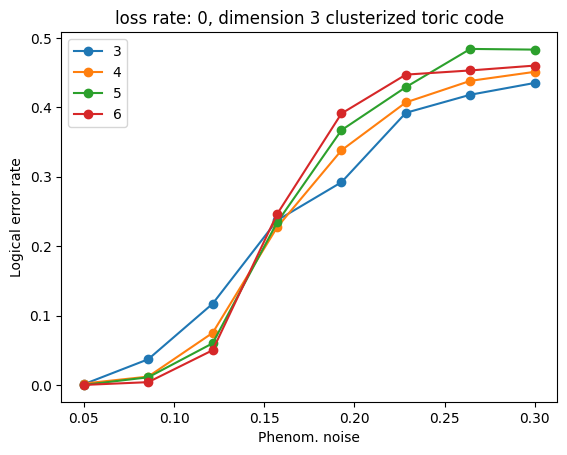

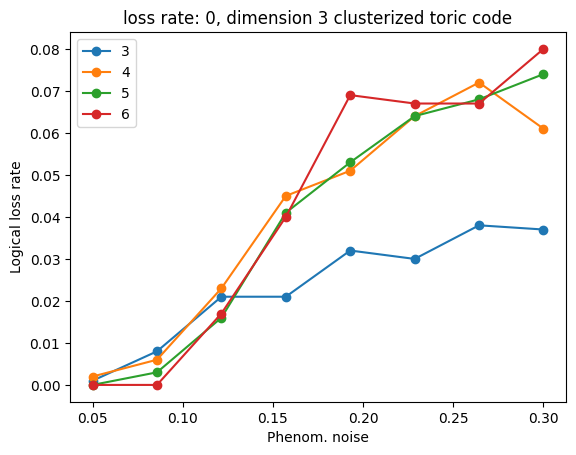

Warning, qubit cell dimension is 2 for a 3-dimensional toric code
Calculating distance 3, loss rate: 0.01
sending twl_parallelized
sending t and ge on batch
total time taken: 2.654252052307129
sending twl_parallelized
sending t and ge on batch
total time taken: 2.690531015396118
sending twl_parallelized
sending t and ge on batch
total time taken: 2.713331460952759
sending twl_parallelized
sending t and ge on batch
total time taken: 2.7493958473205566
sending twl_parallelized
sending t and ge on batch
total time taken: 2.803109645843506
sending twl_parallelized
sending t and ge on batch
total time taken: 2.7592856884002686
sending twl_parallelized
sending t and ge on batch
total time taken: 2.796700954437256
sending twl_parallelized
sending t and ge on batch
total time taken: 2.8521459102630615
Warning, qubit cell dimension is 2 for a 3-dimensional toric code
Calculating distance 4, loss rate: 0.01
sending twl_parallelized
sending t and ge on batch
total time taken: 2.9118075370788574
s

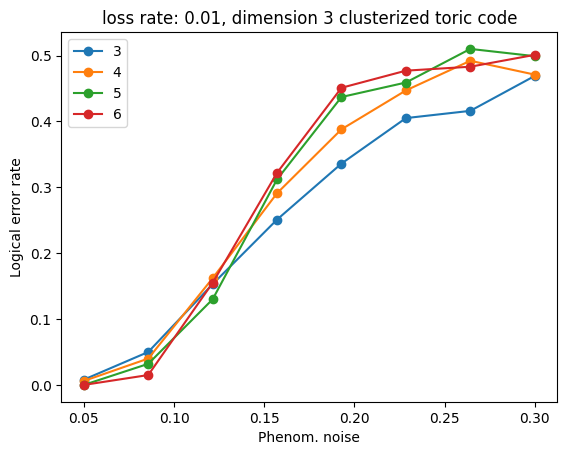

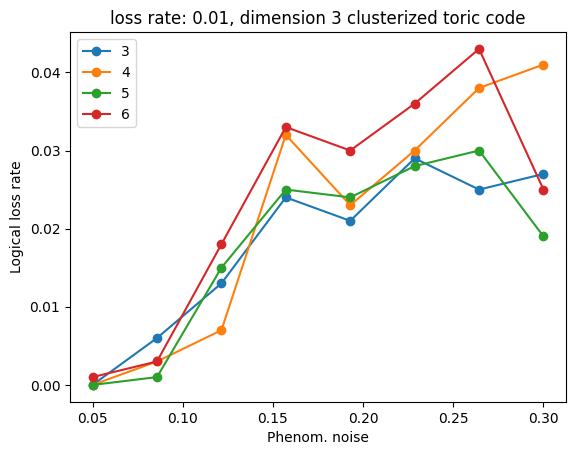

Warning, qubit cell dimension is 2 for a 3-dimensional toric code
Calculating distance 3, loss rate: 0.1
sending twl_parallelized
sending t and ge on batch
total time taken: 3.123922109603882
sending twl_parallelized
sending t and ge on batch
total time taken: 3.0460100173950195
sending twl_parallelized
sending t and ge on batch
total time taken: 3.107936143875122
sending twl_parallelized
sending t and ge on batch
total time taken: 3.126117467880249
sending twl_parallelized
sending t and ge on batch
total time taken: 2.9997141361236572
sending twl_parallelized
sending t and ge on batch
total time taken: 3.086001396179199
sending twl_parallelized
sending t and ge on batch
total time taken: 3.1390419006347656
sending twl_parallelized
sending t and ge on batch
total time taken: 3.105215311050415
Warning, qubit cell dimension is 2 for a 3-dimensional toric code
Calculating distance 4, loss rate: 0.1
sending twl_parallelized
sending t and ge on batch
total time taken: 3.605135202407837
send

In [ ]:
lossy_tooms_sweeps([3, 4, 5, 6], dim=3, error_rates=np.linspace(0.05, 0.3, 8), loss=[0, 0.01, 0.1], n_shots=1000, savefig=False, save_data=False,
                       showfig=True, outdir='erasure_conversion', eras_convert=True, eras_conv_iters=100, n_ca_iters=100)

## Errors are still high - should have been converted to erasure. Check this using lower dim toric 

In [16]:
dim = 3
L = 3

In [17]:
cells, cells2i, b_maps, cob_maps = cell_dicts_and_boundary_maps(distance=L, dimension=dim)
qubit_cell_dim = 2
ne_dirs = [(1, 1), (1, -1), (-1, -1), (-1, 1)]

nq = len(cells[qubit_cell_dim])
n_stab = len(cells[qubit_cell_dim - 1])
ne_maps = [ne_parity_map(cells, qubit_cell_dim, cells2i, dim, L, nq, n_stab, ne_dir=ne_dir) for ne_dir in ne_dirs]
ne_parity_mats_sparse = [csr_matrix(ne_m) for ne_m in ne_maps]

h = np.zeros(shape=(n_stab, nq), dtype=np.uint8)
for stab, qubits in cob_maps[qubit_cell_dim - 1].items():
    h[stab, qubits] = 1
h_sparse = csr_matrix(h)
stabs_per_qubit = len(b_maps[qubit_cell_dim][0])
qbt_syndr_mat = np.where(h.T)[1].reshape((nq, stabs_per_qubit)).astype(dtype=np.int32)  
correlation_surface = csr_matrix(logical_x_toric(cells, qubit_cell_dim, dim, L, cells2i[qubit_cell_dim]))  # Gets binary vector corresponding to the logical operator
lattice_info = h_sparse, correlation_surface, qbt_syndr_mat, ne_parity_mats_sparse, nq
i2qcoord = {v: k for k, v in cells2i[qubit_cell_dim].items()}
i2stabcoord = {v: k for k, v in cells2i[qubit_cell_dim - 1].items()}


In [13]:
errors, losses = gen_errors(nq, 1, error_rate=0.01, loss_rate=0.01)


In [14]:
# visualise_q_and_stab(losses, errors, h, L, i2qcoord, i2stabcoord)

In [15]:
for _ in range(10):
    remaining_error = np.sum(errors)
    print(remaining_error)
    print(np.sum(losses), nq)
    errors, losses = sparse_tooms_iters_eras_conv(num_iters=0, change_dir_freq=10, ne_mats=ne_parity_mats_sparse, q_err_sparse=csr_matrix(errors), h_sparse=h_sparse, loss_sparse=csr_matrix(losses), num_eras_iters=1)
    # visualise_q_and_stab(losses.toarray(), errors.toarray(), h, L, i2qcoord, i2stabcoord)
    

35
32 3000
6
79 3000
5
94 3000
5
97 3000
5
99 3000
5
102 3000
5
102 3000
5
102 3000
5
102 3000
5
102 3000


## try to find an instance where an error remains after doing erasure conversion and inspect the location of the errors:


In [31]:
error_found = False
errors, losses = gen_errors(nq, 1000, error_rate=0.01, loss_rate=0.01)

for _ in range(20):
    num_losses = np.sum(losses)
    remaining_error = np.sum(errors)
    # print(remaining_error)
    # print(np.sum(losses), nq)
    errors, losses = sparse_tooms_iters_eras_conv(num_iters=0, change_dir_freq=10, ne_mats=ne_parity_mats_sparse, q_err_sparse=csr_matrix(errors), h_sparse=h_sparse, loss_sparse=csr_matrix(losses), num_eras_iters=1)

error_out = errors.toarray()

        # visualise_q_and_stab(losses.toarray(), errors.toarray(), h, L, i2qcoord, i2stabcoord)

In [32]:
for ix, es in enumerate(error_out.T):
    if np.sum(es):
        error_ixs = np.where(error_out[:, ix])
        error_coords = [i2qcoord[x] for x in error_ixs[0]]
        print(ix, np.sum(es), error_coords)

        

148 3 [(1, 0, 5), (1, 4, 5), (1, 5, 0)]
164 2 [(3, 3, 2), (4, 3, 1)]
347 2 [(3, 3, 0), (3, 4, 5)]
365 2 [(3, 1, 4), (3, 2, 3)]
682 2 [(5, 1, 2), (5, 2, 1)]


### These remenant error patterns are all two neighbouring cells. It turns out that certain loss configurations combined with two neighbouring errors can give an uncorrectable error, when the losses + errors together form a cube. When this happens they have no 1-boundary.

This shows that the cellular automaton is happy to make bubbles of error because they have no boundary. But if the error types are mixed (loss and flip) it is a problem

Make a distance 5 3d toric code with qubits on faces and see how it performs when you add noise in cubes

In [2]:
L = 5
dim = 3

cells, cells2i, b_maps, cob_maps = cell_dicts_and_boundary_maps(distance=L, dimension=dim)
qubit_cell_dim = 2
ne_dirs = [(1, 1), (1, -1), (-1, -1), (-1, 1)]

nq = len(cells[qubit_cell_dim])
n_stab = len(cells[qubit_cell_dim - 1])
ne_maps = [ne_parity_map(cells, qubit_cell_dim, cells2i, dim, L, nq, n_stab, ne_dir=ne_dir) for ne_dir in ne_dirs]
ne_parity_mats_sparse = [csr_matrix(ne_m) for ne_m in ne_maps]

h = np.zeros(shape=(n_stab, nq), dtype=np.uint8)
for stab, qubits in cob_maps[qubit_cell_dim - 1].items():
    h[stab, qubits] = 1
h_sparse = csr_matrix(h)
stabs_per_qubit = len(b_maps[qubit_cell_dim][0])
qbt_syndr_mat = np.where(h.T)[1].reshape((nq, stabs_per_qubit)).astype(dtype=np.int32)  
correlation_surface = csr_matrix(logical_x_toric(cells, qubit_cell_dim, dim, L, cells2i[qubit_cell_dim]))  # Gets binary vector corresponding to the logical operator
lattice_info = h_sparse, correlation_surface, qbt_syndr_mat, ne_parity_mats_sparse, nq
i2qcoord = {v: k for k, v in cells2i[qubit_cell_dim].items()}
i2stabcoord = {v: k for k, v in cells2i[qubit_cell_dim - 1].items()}


In [18]:
cube_coords = [(1, 1, 0), (1, 0, 1), (0, 1, 1), (2, 1, 1), (1, 1, 2), (1, 2, 1)]
cube_ixs = [cells2i[2][x] for x in cube_coords]
error_mat, losses_mat = np.zeros((nq, 1)), np.zeros((nq, 1))
corr_surf = correlation_surface.toarray()
corr_surf_ixs = np.where(corr_surf)

In [19]:
corr_surf_ixs

(array([30, 31, 32, 33, 34], dtype=int64), array([0, 0, 0, 0, 0], dtype=int64))

In [21]:
[i2qcoord[x] for x in corr_surf_ixs[0]]

[(1, 1, 0), (1, 1, 2), (1, 1, 4), (1, 1, 6), (1, 1, 8)]

# 3D Toric code with qubits on faces, creating loss cubes by changing the direction of the erasure conversion sweep


In [2]:
L = 5
dim = 3

cells, cells2i, b_maps, cob_maps = cell_dicts_and_boundary_maps(distance=L, dimension=dim)
qubit_cell_dim = 2
ne_dirs = [(1, 1), (1, -1), (-1, -1), (-1, 1)]

nq = len(cells[qubit_cell_dim])
n_stab = len(cells[qubit_cell_dim - 1])
ne_maps = [ne_parity_map(cells, qubit_cell_dim, cells2i, dim, L, nq, n_stab, ne_dir=ne_dir) for ne_dir in ne_dirs]
ne_parity_mats_sparse = [csr_matrix(ne_m) for ne_m in ne_maps]

h = np.zeros(shape=(n_stab, nq), dtype=np.uint8)
for stab, qubits in cob_maps[qubit_cell_dim - 1].items():
    h[stab, qubits] = 1
h_sparse = csr_matrix(h)
stabs_per_qubit = len(b_maps[qubit_cell_dim][0])
qbt_syndr_mat = np.where(h.T)[1].reshape((nq, stabs_per_qubit)).astype(dtype=np.int32)  
correlation_surface = csr_matrix(logical_x_toric(cells, qubit_cell_dim, dim, L, cells2i[qubit_cell_dim]))  # Gets binary vector corresponding to the logical operator
lattice_info = h_sparse, correlation_surface, qbt_syndr_mat, ne_parity_mats_sparse, nq
i2qcoord = {v: k for k, v in cells2i[qubit_cell_dim].items()}
i2stabcoord = {v: k for k, v in cells2i[qubit_cell_dim - 1].items()}

In [4]:
lossy_tooms_sweeps([3, 4, 5, 6], dim=3, error_rates=np.linspace(0.01, 0.17, 8), loss=[0, 0.01, 0.05], n_shots=1000, savefig=False, save_data=False,
                       showfig=True, outdir='erasure_conversion', eras_convert=True, n_ca_iters=100, eras_conv_iters=40)

Warning, qubit cell dimension is 2 for a 3-dimensional toric code
Calculating distance 3, loss rate: 0
sending twl_parallelized
sending t and ge on batch



KeyboardInterrupt



In [20]:
# error_found = False
errors, losses = gen_errors(nq, 1000, error_rate=0.01, loss_rate=0.01)

# for _ in range(20):
#     num_losses = np.sum(losses)
#     remaining_error = np.sum(errors)
#     # print(remaining_error)
#     # print(np.sum(losses), nq)
errors_after, losses_after = sparse_tooms_iters_eras_conv(num_iters=10, change_dir_freq=10, ne_mats=ne_parity_mats_sparse, q_err_sparse=csr_matrix(errors), h_sparse=h_sparse, loss_sparse=csr_matrix(losses), num_eras_iters=100)

error_out = errors_after.toarray()
losses_out = losses_after.toarray()


4 skips, exiting after 95 iters


In [2]:
for ix, es in enumerate(error_out.T):
    if np.sum(es):
        # check if the errors have a boundary
        print((h @ es) % 2)
        error_ixs = np.where(error_out[:, ix])
        error_coords = [i2qcoord[x] for x in error_ixs[0]]
        loss_ixs = np.where(losses_out[:, ix])
        loss_coords = [i2qcoord[x] for x in loss_ixs[0]]
        # print(ix, np.sum(es), np.sum(losses_out[:, ix]), error_coords, loss_coords)


NameError: name 'error_out' is not defined

In [7]:
custom_errors = errors[:, 10]
custom_losses = losses[:, 10]

error_ixs = np.where(custom_errors)
error_coords = [i2qcoord[x] for x in error_ixs[0]]
loss_ixs = np.where(custom_losses)
loss_coords = [i2qcoord[x] for x in loss_ixs[0]]
print(error_coords, loss_coords)

[(0, 1, 5), (1, 0, 9), (1, 2, 3), (1, 2, 7), (1, 4, 1), (1, 7, 2), (1, 7, 6), (1, 9, 6), (2, 3, 3), (2, 5, 9), (2, 7, 5), (2, 9, 7), (3, 0, 7), (3, 1, 6), (3, 3, 2), (3, 7, 2), (3, 8, 9), (3, 9, 4), (4, 5, 5), (5, 4, 3), (5, 5, 6), (5, 6, 3), (6, 1, 7), (6, 5, 7), (6, 7, 9), (6, 9, 5), (7, 6, 1), (7, 7, 4), (7, 8, 7), (8, 5, 3), (8, 7, 3), (8, 9, 9), (9, 1, 8), (9, 2, 1), (9, 2, 9), (9, 4, 5)] [(3, 5, 8), (5, 8, 3), (7, 3, 6)]


In [13]:
def errors_losses_from_ixs(err_ix, loss_ix, nq):
    errors, losses = np.zeros((nq, 1)), np.zeros((nq, 1))
    errors[err_ix, 0] = 1
    losses[loss_ix, 0] = 1
    return errors, losses

In [14]:
e_sp, l_sp = csr_matrix(custom_errors.reshape((nq, 1))), csr_matrix(custom_losses.reshape((nq, 1)))

In [29]:
errors, losses = sparse_tooms_iters_eras_conv(num_iters=200, change_dir_freq=10, ne_mats=ne_parity_mats_sparse, q_err_sparse=e_sp, h_sparse=h_sparse, loss_sparse=l_sp, num_eras_iters=200)


In [30]:
print(np.sum(errors), np.sum(losses))

91 40


In [32]:
error_ixs = np.where(errors.toarray())
error_coords = [i2qcoord[x] for x in error_ixs[0]]
loss_ixs = np.where(losses.toarray())
loss_coords = [i2qcoord[x] for x in loss_ixs[0]]
print(error_coords, loss_coords)

[(0, 5, 7), (1, 0, 1), (1, 0, 5), (1, 0, 7), (1, 0, 9), (1, 1, 2), (1, 1, 6), (1, 2, 7), (1, 2, 9), (1, 3, 0), (1, 3, 2), (1, 4, 1), (1, 8, 5), (1, 9, 4), (1, 9, 6), (2, 1, 1), (2, 1, 7), (2, 1, 9), (2, 3, 1), (2, 9, 9), (3, 0, 9), (3, 8, 9), (3, 9, 0), (3, 9, 8), (4, 1, 5), (4, 1, 9), (4, 3, 1), (4, 3, 5), (4, 9, 1), (4, 9, 7), (5, 0, 1), (5, 0, 5), (5, 0, 7), (5, 1, 0), (5, 1, 4), (5, 1, 6), (5, 1, 8), (5, 2, 1), (5, 2, 9), (5, 3, 0), (5, 3, 2), (5, 3, 4), (5, 3, 6), (5, 4, 1), (5, 4, 5), (5, 8, 1), (5, 8, 7), (5, 8, 9), (5, 9, 2), (5, 9, 6), (6, 1, 3), (6, 1, 7), (6, 3, 3), (6, 7, 5), (6, 7, 7), (6, 9, 5), (7, 1, 0), (7, 1, 2), (7, 2, 1), (7, 2, 7), (7, 2, 9), (7, 3, 0), (7, 3, 6), (7, 4, 1), (7, 4, 3), (7, 4, 5), (7, 6, 5), (7, 6, 7), (7, 7, 4), (7, 7, 8), (8, 1, 1), (8, 1, 3), (8, 1, 5), (8, 3, 3), (8, 3, 5), (8, 5, 7), (8, 7, 5), (8, 7, 7), (9, 0, 5), (9, 1, 2), (9, 1, 6), (9, 2, 7), (9, 2, 9), (9, 3, 0), (9, 3, 2), (9, 4, 1), (9, 4, 7), (9, 5, 6), (9, 5, 8), (9, 6, 7), (9, 8, 5)

In [34]:
print(nq)


375


# How much syndrome remains on not lost stabilizers after the direction changing Toom's rule? Investigate for the 3D case

In [2]:
L = 5
dim = 3

In [3]:
cells, cells2i, b_maps, cob_maps = cell_dicts_and_boundary_maps(distance=L, dimension=dim)
qubit_cell_dim = 2
ne_dirs = [(1, 1), (1, -1), (-1, -1), (-1, 1)]

nq = len(cells[qubit_cell_dim])
n_stab = len(cells[qubit_cell_dim - 1])
ne_maps = [ne_parity_map(cells, qubit_cell_dim, cells2i, dim, L, nq, n_stab, ne_dir=ne_dir) for ne_dir in ne_dirs]
ne_parity_mats_sparse = [csr_matrix(ne_m) for ne_m in ne_maps]

h = np.zeros(shape=(n_stab, nq), dtype=np.uint8)
for stab, qubits in cob_maps[qubit_cell_dim - 1].items():
    h[stab, qubits] = 1
h_sparse = csr_matrix(h)
stabs_per_qubit = len(b_maps[qubit_cell_dim][0])
qbt_syndr_mat = np.where(h.T)[1].reshape((nq, stabs_per_qubit)).astype(dtype=np.int32)  
correlation_surface = logical_x_toric(cells, qubit_cell_dim, dim, L, cells2i[qubit_cell_dim])
correlation_surface_sparse = csr_matrix(correlation_surface)  # Gets binary vector corresponding to the logical operator
lattice_info = h_sparse, correlation_surface_sparse, qbt_syndr_mat, ne_parity_mats_sparse, nq
i2qcoord = {v: k for k, v in cells2i[qubit_cell_dim].items()}
i2stabcoord = {v: k for k, v in cells2i[qubit_cell_dim - 1].items()}
h_with_logop = np.vstack([h, correlation_surface.T])

In [4]:
# error_found = False
error_rate, loss_rate = 0.01, 0.01
errors, losses = gen_errors(nq, 10000, error_rate=error_rate, loss_rate=loss_rate)

# for _ in range(20):
#     num_losses = np.sum(losses)
#     remaining_error = np.sum(errors)
#     # print(remaining_error)
#     # print(np.sum(losses), nq)
errors_after, losses_after = sparse_tooms_iters_eras_conv(num_iters=50, change_dir_freq=10, ne_mats=ne_parity_mats_sparse, q_err_sparse=csr_matrix(errors), h_sparse=h_sparse, loss_sparse=csr_matrix(losses), num_eras_iters=50)

error_out = errors_after.toarray()
losses_out = losses_after.toarray()

### Check if there has been a logical error, and show the original and final errors

In [6]:
n_shots = errors.shape[1]
lq = [np.where(losses_out[:, j])[0] for j in range(n_shots)]
for i in range(n_shots):
    this_lq = lq[i]
    # print(len(lq))
    log_error, log_loss = loss_decode_check_error([this_lq], h_with_logop, qbt_syndr_mat, error_rate, error_out, batch_size=1)
    if log_error or log_loss:
        error_ixs = np.where(error_out[:, i])[0]
        print(f'Error on iterate {i}, {log_error=}, {log_loss=}')
        # loss_ixs = np.where(losses_out[:, i])[0]
        # print(np.where(synd_not_lost[:, i])[0])
        # print(f'remaining syndrome indices: {[i2stabcoord[ix] for ix in np.where(synd_not_lost[:, i])[0]]}')
        print(f'remaining error indices: {[i2qcoord[ix] for ix in error_ixs]}')
        print(f'remaining loss indices: {[i2qcoord[ix] for ix in this_lq]}')
        print('\n')
        original_error_ixs = np.where(errors[:, i])[0]
        original_loss_ixs = np.where(losses[:, i])[0]
        print(f'original error indices: {[i2qcoord[ix] for ix in original_error_ixs]}')
        print(f'original loss indices: {[i2qcoord[ix] for ix in original_loss_ixs]}')    
        

Error on iterate 3291, log_error=0, log_loss=1
remaining error indices: []
remaining loss indices: [(0, 1, 1), (0, 1, 9), (0, 3, 9), (0, 5, 1), (0, 5, 3), (0, 5, 5), (0, 5, 9), (0, 7, 1), (0, 7, 3), (0, 7, 5), (0, 7, 9), (0, 9, 1), (0, 9, 3), (0, 9, 5), (0, 9, 9), (1, 0, 1), (1, 0, 3), (1, 0, 5), (1, 0, 9), (1, 1, 0), (1, 1, 8), (1, 2, 9), (1, 3, 0), (1, 3, 8), (1, 4, 1), (1, 4, 3), (1, 4, 5), (1, 4, 9), (1, 5, 0), (1, 5, 2), (1, 5, 4), (1, 5, 6), (1, 5, 8), (1, 6, 1), (1, 6, 3), (1, 6, 5), (1, 6, 9), (1, 7, 0), (1, 7, 2), (1, 7, 4), (1, 7, 6), (1, 7, 8), (1, 8, 1), (1, 8, 3), (1, 8, 5), (1, 8, 9), (1, 9, 0), (1, 9, 2), (1, 9, 4), (1, 9, 6), (1, 9, 8), (2, 1, 9), (2, 3, 9), (2, 5, 1), (2, 5, 3), (2, 5, 5), (2, 5, 9), (2, 7, 1), (2, 7, 3), (2, 7, 5), (2, 7, 9), (2, 9, 1), (2, 9, 3), (2, 9, 5), (2, 9, 9), (3, 0, 9), (3, 1, 0), (3, 1, 8), (3, 2, 9), (3, 3, 0), (3, 3, 8), (3, 4, 9), (3, 5, 0), (3, 5, 8), (3, 6, 9), (3, 7, 0), (3, 7, 8), (3, 8, 9), (3, 9, 0), (3, 9, 8), (4, 1, 9), (4, 3, 9)

In [9]:
custom_errors = errors[:, 3291]
custom_losses = losses[:, 3291]
custom_errors, custom_losses = custom_errors.reshape(nq, 1), custom_losses.reshape(nq, 1)
for _ in range(10):
    custom_errors, loss_sp = csr_matrix(custom_errors, shape=(nq, 1)), csr_matrix(custom_losses, shape=(nq, 1))
    if _ % 4:
        tmp_list = ne_parity_mats_sparse[1:]
        tmp_list.append(ne_parity_mats_sparse[0])
        ne_parity_mats_sparse = tmp_list
        # print(ne_parity_mats_sparse)
    esp_out, loss_out = sparse_tooms_iters_eras_conv(num_iters=1, change_dir_freq=10, ne_mats=ne_parity_mats_sparse, q_err_sparse=custom_errors, h_sparse=h_sparse, loss_sparse=loss_sp, num_eras_iters=0)
    custom_errors, custom_losses = esp_out.toarray(), loss_out.toarray()
    # print(custom_errors.shape, custom_errors)
    error_ixs = np.where(custom_errors)[0]
    loss_ixs = np.where(custom_losses)[0]
    # print(np.where(synd_not_lost[:, i])[0])
    # print(f'remaining syndrome indices: {[i2stabcoord[ix] for ix in np.where(synd_not_lost[:, i])[0]]}')
    print(f'remaining error indices: {[i2qcoord[ix] for ix in error_ixs]}')
    print(f'remaining loss indices: {[i2qcoord[ix] for ix in loss_ixs]}')
    
for _ in range(10):
    custom_errors, loss_sp = csr_matrix(custom_errors, shape=(nq, 1)), csr_matrix(custom_losses, shape=(nq, 1))
    if _ % 4:
        tmp_list = ne_parity_mats_sparse[1:]
        tmp_list.append(ne_parity_mats_sparse[0])
        ne_parity_mats_sparse = tmp_list
        # print(ne_parity_mats_sparse)
    esp_out, loss_out = sparse_tooms_iters_eras_conv(num_iters=0, change_dir_freq=10, ne_mats=ne_parity_mats_sparse, q_err_sparse=custom_errors, h_sparse=h_sparse, loss_sparse=loss_sp, num_eras_iters=1)
    custom_errors, custom_losses = esp_out.toarray(), loss_out.toarray()
    # print(custom_errors.shape, custom_errors)
    error_ixs = np.where(custom_errors)[0]
    loss_ixs = np.where(custom_losses)[0]
    # print(np.where(synd_not_lost[:, i])[0])
    # print(f'remaining syndrome indices: {[i2stabcoord[ix] for ix in np.where(synd_not_lost[:, i])[0]]}')
    print(f'remaining error indices: {[i2qcoord[ix] for ix in error_ixs]}')
    print(f'remaining loss indices: {[i2qcoord[ix] for ix in loss_ixs]}')




remaining error indices: [(0, 1, 5), (2, 1, 5)]
remaining loss indices: [(1, 0, 5), (1, 3, 0), (1, 9, 6), (3, 8, 9), (5, 4, 9), (6, 5, 3), (7, 6, 3), (8, 5, 1), (9, 1, 2), (9, 4, 3), (9, 6, 1), (9, 7, 4)]
remaining error indices: []
remaining loss indices: [(1, 0, 5), (1, 3, 0), (1, 9, 6), (3, 8, 9), (5, 4, 9), (6, 5, 3), (7, 6, 3), (8, 5, 1), (9, 1, 2), (9, 4, 3), (9, 6, 1), (9, 7, 4)]
remaining error indices: []
remaining loss indices: [(1, 0, 5), (1, 3, 0), (1, 9, 6), (3, 8, 9), (5, 4, 9), (6, 5, 3), (7, 6, 3), (8, 5, 1), (9, 1, 2), (9, 4, 3), (9, 6, 1), (9, 7, 4)]
remaining error indices: []
remaining loss indices: [(1, 0, 5), (1, 3, 0), (1, 9, 6), (3, 8, 9), (5, 4, 9), (6, 5, 3), (7, 6, 3), (8, 5, 1), (9, 1, 2), (9, 4, 3), (9, 6, 1), (9, 7, 4)]
remaining error indices: []
remaining loss indices: [(1, 0, 5), (1, 3, 0), (1, 9, 6), (3, 8, 9), (5, 4, 9), (6, 5, 3), (7, 6, 3), (8, 5, 1), (9, 1, 2), (9, 4, 3), (9, 6, 1), (9, 7, 4)]
remaining error indices: []
remaining loss indices: [(1

In [12]:
error_syndrome_after = h_sparse @ errors_after
error_syndrome_after.data %= 2
loss_synd = (h @ losses_out) != 0

synd_all = error_syndrome_after.toarray()
synd_not_lost = synd_all - synd_all * loss_synd
tot_remaining = (np.sum(synd_not_lost, axis=0) != 0)
print(sum(tot_remaining) / 1000)


0.0


In [13]:
# fidn and print the remaining syndrome
dodgy_boys = [None, None]
n_shots = errors.shape[1]
for i in range(n_shots):
    if tot_remaining[i]:
        error_ixs = np.where(error_out[:, i])[0]
        loss_ixs = np.where(losses_out[:, i])[0]
        print(np.where(synd_not_lost[:, i])[0])
        print(f'remaining syndrome indices: {[i2stabcoord[ix] for ix in np.where(synd_not_lost[:, i])[0]]}')
        print(f'remaining error indices: {[i2qcoord[ix] for ix in error_ixs]}')
        print(f'remaining loss indices: {[i2qcoord[ix] for ix in loss_ixs]}')
        dodgy_boys = (error_out[:, i], losses_out[:, i])
        
        print(np.sum(synd_not_lost, axis=0)[i], len(synd_not_lost[:, i]), 5**3 * 3)

In [148]:
for mat in dodgy_boys:
    mat = mat.reshape(nq, 1)
    
custom_errors, custom_losses = dodgy_boys[0].reshape(nq, 1), dodgy_boys[1].reshape(nq, 1)
print(custom_errors.shape)



(375, 1)


In [152]:

for _ in range(16):
    custom_errors, loss_sp = csr_matrix(custom_errors, shape=(nq, 1)), csr_matrix(custom_losses, shape=(nq, 1))
    if _ % 4:
        tmp_list = ne_parity_mats_sparse[1:]
        tmp_list.append(ne_parity_mats_sparse[0])
        ne_parity_mats_sparse = tmp_list
        # print(ne_parity_mats_sparse)
    esp_out, loss_out = sparse_tooms_iters_eras_conv(num_iters=0, change_dir_freq=10, ne_mats=ne_parity_mats_sparse, q_err_sparse=custom_errors, h_sparse=h_sparse, loss_sparse=loss_sp, num_eras_iters=1)
    custom_errors, custom_losses = esp_out.toarray(), loss_out.toarray()
    # print(custom_errors.shape, custom_errors)
    error_ixs = np.where(custom_errors)[0]
    loss_ixs = np.where(custom_losses)[0]
    # print(np.where(synd_not_lost[:, i])[0])
    # print(f'remaining syndrome indices: {[i2stabcoord[ix] for ix in np.where(synd_not_lost[:, i])[0]]}')
    print(f'remaining error indices: {[i2qcoord[ix] for ix in error_ixs]}')
    print(f'remaining loss indices: {[i2qcoord[ix] for ix in loss_ixs]}')

remaining error indices: []
remaining loss indices: [(0, 5, 1), (1, 0, 7), (1, 4, 1), (1, 5, 0), (1, 5, 2), (1, 6, 1), (2, 5, 1), (7, 1, 4)]
remaining error indices: []
remaining loss indices: [(0, 5, 1), (1, 0, 7), (1, 4, 1), (1, 5, 0), (1, 5, 2), (1, 6, 1), (2, 5, 1), (7, 1, 4)]
remaining error indices: []
remaining loss indices: [(0, 5, 1), (1, 0, 7), (1, 4, 1), (1, 5, 0), (1, 5, 2), (1, 6, 1), (2, 5, 1), (7, 1, 4)]
remaining error indices: []
remaining loss indices: [(0, 5, 1), (1, 0, 7), (1, 4, 1), (1, 5, 0), (1, 5, 2), (1, 6, 1), (2, 5, 1), (7, 1, 4)]
remaining error indices: []
remaining loss indices: [(0, 5, 1), (1, 0, 7), (1, 4, 1), (1, 5, 0), (1, 5, 2), (1, 6, 1), (2, 5, 1), (7, 1, 4)]
remaining error indices: []
remaining loss indices: [(0, 5, 1), (1, 0, 7), (1, 4, 1), (1, 5, 0), (1, 5, 2), (1, 6, 1), (2, 5, 1), (7, 1, 4)]
remaining error indices: []
remaining loss indices: [(0, 5, 1), (1, 0, 7), (1, 4, 1), (1, 5, 0), (1, 5, 2), (1, 6, 1), (2, 5, 1), (7, 1, 4)]
remaining err